<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#問1:-$2^x$のplot" data-toc-modified-id="問1:-$2^x$のplot-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>問1: $2^x$のplot</a></span></li><li><span><a href="#問2:-平均変化率" data-toc-modified-id="問2:-平均変化率-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>問2: 平均変化率</a></span></li><li><span><a href="#問3:-接線" data-toc-modified-id="問3:-接線-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>問3: 接線</a></span></li><li><span><a href="#問4:-関数とその一次導関数の同時プロット" data-toc-modified-id="問4:-関数とその一次導関数の同時プロット-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>問4: 関数とその一次導関数の同時プロット</a></span></li><li><span><a href="#問5:-一次導関数が恒等的にほぼ一致する$b$" data-toc-modified-id="問5:-一次導関数が恒等的にほぼ一致する$b$-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>問5: 一次導関数が恒等的にほぼ一致する$b$</a></span></li><li><span><a href="#問6:-ネイピア数のオイラーによる定義" data-toc-modified-id="問6:-ネイピア数のオイラーによる定義-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>問6: ネイピア数のオイラーによる定義</a></span><ul class="toc-item"><li><span><a href="#解答例" data-toc-modified-id="解答例-6.1"><span class="toc-item-num">6.1&nbsp;&nbsp;</span>解答例</a></span></li></ul></li><li><span><a href="#問7:-おまけ(時間が余ったらやってください)" data-toc-modified-id="問7:-おまけ(時間が余ったらやってください)-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>問7: おまけ(時間が余ったらやってください)</a></span></li></ul></div>

<br />

<div style="text-align: center;">
<font size="5">数式処理group work-2(関数と微分)</font>
</div>
<br />
<div style="text-align: right;">
<font size="4">file:/~/python/doing_math_with_python/symbolic_math/gw2_diff_ans.ipynb</font>
<br />
<font size="4">cc by Shigeto R. Nishitani 2009-2021  </font>
</div> 

: ruby bin/pick_works_from_ans.rb gitignores/gw2_diff_ans.ipynb -1 '4 17 23' '13'


対数関数の狙いが先週の課題で明らかになったでしょうか．
主な応用分野は制御系の計算で，その昔は大砲の着弾距離を計算するのが主な仕事でした．
では，対数・指数でexpってのがありますが，
なんであんな中途半端な数を使わにゃいかんニャロって思ったことないですか．
それを導いてもらおうというのが今日の狙いです．

# 問1: $2^x$のplot
指数関数
$$
f(x; b=2) = b^x
$$
について考える．
$f(x; b=2)$の表記は，$b$が助変数で，そのデフォルト値が2であることを意図している．
1. 次の表を埋めよ．また，
2. 関数$f(x; 2)$をプロットして確認せよ．

| x   | -1 | 0 | 1 | 2 | 3 |
| ---|---|---|---|---|---|
| f(x; 2)|

0.5
1
2
4
8


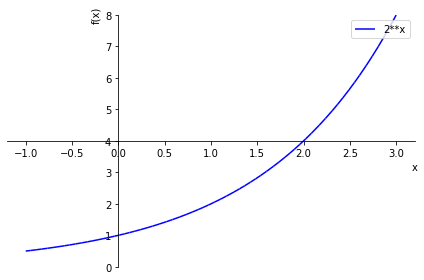

In [1]:
from sympy import *
def f(x, b=2):
    return b**x

for i in range(5):
    print(f(i-1))

%matplotlib inline
x = symbols('x')    
p = plot(f(x),
         (x, -1, 3), ylim=[0,8],
         legend=True, show=False)
p[0].line_color = 'b'
p.show()



| x   | -1 | 0 | 1 | 2 | 3 |
| ---|---|---|---|---|---|
| f(x)|0.5|1.0|2.0|4.0|8.0

# 問2: 平均変化率
問1.の指数関数に対して，平均変化率
$$
m0(x; h) = \frac{f(x+h)-f(x)}{x+h-x}
$$
を求める式を考える．

1. x=0..2(x=0からx=2)の傾きを求めよ．
2. それらの点の間を結ぶ直線の方程式を求めよ．
3. また，元の関数と同時にプロットせよ．
4. x=0..1(x=0からx=1)についても同様に求め，同時にプロットせよ．


1.0


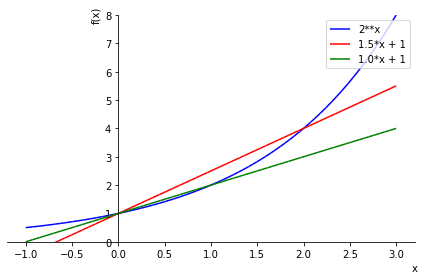

In [2]:
%matplotlib inline
from sympy import *
def f(x, b=2):
    return b**x
def m0(x0, h):
    return (f(x0+h)-f(x0))/(h)

print(m0(0,1))
x = symbols('x')    
p = plot(f(x), m0(0,2)*x+f(0), 
         m0(0,1)*x+f(0), 
         (x, -1, 3), ylim=[0,8],
         legend=True, show=False)
p[0].line_color = 'b'
p[1].line_color = 'r'
p[2].line_color = 'g'
p.show()


# 問3: 接線
1. 問1.の関数に対して，x=0における接線の傾きを微分により求めよ．また問2.でx=0..0.1に対して求めた値と小数点以下5桁で比べよ．
   1. なお浮動小数点数での表示は，`print("%10.5f" % log(2))`が便利．
1. 問1.の関数に対して，x=0における接線の方程式を求め，同時にプロットせよ．
2. 問2.で作成したプロットをx=0..0.1に対して行い,1.で作成した関数と同時プロットして比較せよ．


問3，4，5の解答例では問1,2の解答例と違って，テキストの表記に従っているので注意せよ．

In [3]:
from sympy import *

x = symbols('x')

f0 = 2**x
df0 = diff(f0,x)
print(df0)

x0 = 0
a = df0.subs({x:x0})
print(a)
print("%10.5f" % log(2))
print("%10.5f" % m0(0, 0.1))

2**x*log(2)
log(2)
   0.69315
   0.71773


In [4]:
f1 = a*(x-x0)+f0.subs({x:x0})
pprint(f1)

x⋅log(2) + 1


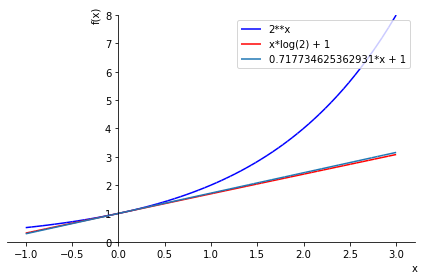

In [5]:
%matplotlib inline
from sympy.plotting import plot

p = plot(f0,f1,
         m0(0,0.1)*x+f(0), 
         (x, -1,3), ylim=[0,8],
         legend=True, show=False)
p[0].line_color = 'b'
p[1].line_color = 'r'
p.show()

# 問4: 関数とその一次導関数の同時プロット
問1.の関数とその一次導関数を同時にプロットすると次のようになる．一次導関数の意味を言葉で述べよ．

2**x


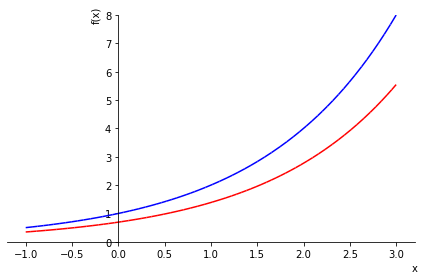

In [6]:
%matplotlib inline
from sympy.plotting import plot
from sympy import *

x = symbols('x')

f0 = 2**x
print(f0)
f1 = diff(f0,x)
p = plot(f0,f1,
         (x, -1,3), ylim=[0,8],
         show=False)
p[0].line_color = 'b'
p[1].line_color = 'r'
p.show()

# 問5: 一次導関数が恒等的にほぼ一致する$b$
関数
$$
f(x) = b^x, \, \textrm{where} \,2 < b < 3
$$
と，その一次導関数が恒等的にほぼ一致する$b$を，
上のグラフの指数関数の底’2’を色々変えて小数点以下1桁で求めよ．

2.7**x


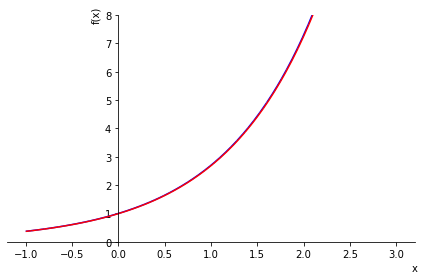

In [7]:
%matplotlib inline
from sympy.plotting import plot
from sympy import *

x = symbols('x')

f0 = 2.7**x
print(f0)
f1 = diff(f0,x)
p = plot(f0,f1,
         (x, -1,3), ylim=[0,8],
         show=False)
p[0].line_color = 'b'
p[1].line_color = 'r'
p.show()

# 問6: ネイピア数のオイラーによる定義
問5で求めた数は自然対数の底e(ネイピア数)のオイラーによる定義である．
1. ネイピア数の定義を，この導出にしたがって，言葉で述べよ．
2. $f(x; b)=b^x$を問2.の平均変化率の定義に代入し変形することによって，
$$
m2(h; b) = \frac{b^h-1}{h}
$$
としたときに，$b$がネイピア数であるならば$m2(h; b)$が$h \rightarrow 0$で取るべき値はなんであるか．
3. また，

> plot(m2(h, 2),m2(h, exp(1)),m2(h, 3),(h, -1, 3))

で結果を確かめよ． 

## 解答例
ネイピア数は，指数関数に於いて，一次導関数がそれ自身の関数と一致する指数関数の底となる実数として定義できる．

$f(x; b)=b^x$を平均変化率の式に入れると
$$
m1(x; h, b) = \frac{b^{x+h}-b^x}{h}=b^x \frac{b^h-1}{h}
$$
である．これを$h\rightarrow 0$にとると
$$
\lim_{h\rightarrow 0}m1(x; h, b) = 
b^x \lim_{h\rightarrow 0}\frac{b^h-1}{h}
$$
となる．これがその関数自身と等しくなるためには，
$$
\lim_{h\rightarrow 0}\frac{b^h-1}{h} = 1
$$
である必要がある．

これを変数が$h$，助変数が$b$の関数
$$
m2(h; b) = \frac{b^h-1}{h}
$$
とみなして，b = 2, exp(1), 3をとってplotすると次の通りとなる．
h=0に於いて，値が1となるのは，exp(1)であることが確認できる．


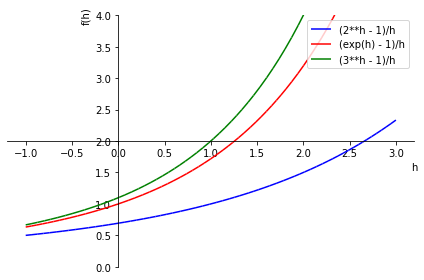

In [8]:
%matplotlib inline
from sympy import *
def m2(h, b):
    return (b**h-1)/h

h = symbols('h')    
p = plot(m2(h, 2), m2(h, exp(1)), 
         m2(h, 3), 
         (h, -1,3), ylim=[0,4],
         legend=True, show=False)
p[0].line_color = 'b'
p[1].line_color = 'r'
p[2].line_color = 'g'
p.show()



この$m1(x; h, b)$には少し注意が必要．
$m1(x, h; b)$として扱った方がいいかも．
なぜならば，平均変化率を取るときには，
$h$を助変数としていたが，最後のplotでは
独立変数として導いている．

# 問7: おまけ(時間が余ったらやってください)
関数
$$
f_1(x) = \frac{x}{x^2-2x+4}
$$
を考える．
1. $f_1(x)$を積分した関数$f_0(x)$を求めよ．
2. 関数$f_1(x)$の１次導関数$f_2(x)$を求め，３つの関数を同時にプロットせよ．
3. この$f_0$関数の極小値，変曲点の$x$座標をグラフから求めよ．
4. この$f_0$関数の増減表を作れ．

In [9]:
from sympy import *

x = symbols('x')

f1 = x/(x**2 -2*x + 4)
print(f1)
print(integrate(f1,x))
f0 = integrate(f1,x)
print(diff(f0,x))


x/(x**2 - 2*x + 4)
log(x**2 - 2*x + 4)/2 + sqrt(3)*atan(sqrt(3)*x/3 - sqrt(3)/3)/3
(2*x - 2)/(2*(x**2 - 2*x + 4)) + 1/(3*((sqrt(3)*x/3 - sqrt(3)/3)**2 + 1))


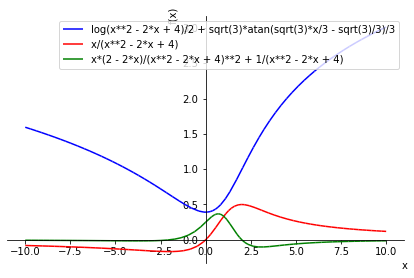

In [12]:
%matplotlib inline
from sympy import *

f2 = diff(f1,x)

p = plot(f0,f1,f2, legend=True,show=False)
p[0].line_color = 'b'
p[1].line_color = 'r'
p[2].line_color = 'g'

p.show()

| $x$  |$\cdots$| -2 |$\cdots$| 0 |$\cdots$| 2 |$\cdots$|
|:-:|:-:|:-:|:-:|:-:|:-:|:-:|:-:|
| $f_0(x)$|$\frown \searrow$|.|$\smile \searrow$|min|$\smile \nearrow$|.|$\frown \nearrow$|
| $f_1(x)=\frac{df_0}{dx}$|-|-|-|0|+|+|+|
| $f_2(x)=\frac{d^2f_0}{dx^2}$|-|0|+|+|+|0|-|